### HUSK AT KIGGE HER: https://github.com/suneman/socialgraphs2025/wiki/Assignments

Denne fortæller at vi skal repeat the questions, når iv svarer på dem.

Ikke lav notebooken for lang.

Læs spørgsmålene forsigtig, og svar på alle sub-spørgsmål.

Split svarene op i forskellige kode sektioner.

Hold koden kort og god. Ikke nogle lange outputs derbare er der.

Alle plots skal vises flot. (Labels osv)

Alle figuere skal forklares.

Der skal refereres. 

Vær præcis og undgå at bruge objektivt sprog som "I think og", "In my opinion"

In [1]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Assignment 1.1 - Exploring WS And BA Models

#### What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

The problem using random networks, to model real-world networks stems from the lack of outliers within the generated dataset. The book mentions people like President Rosevelt that had 22.000 acquaintances or Facebook users with the max amount of 5000 friends.

All data points wihtin the random network lie in the ranger of ⟨k⟩ &plusmn; $\sigma_k$ which as per the reasoning above would miss crucial data points that reflect the real world.

#### List the four regimes that characterize random networks as a function of ⟨k⟩.

The four regimes are: 

* Subcritical - 0 < ⟨k⟩ < 1 
* Critical  - ⟨k⟩ = 1
* Supercritical - ⟨k⟩ > 1
* Connected - ⟨k⟩ = ln(N)


#### According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

This is because the random network predictions, predict that the clustering coefficient is non-dependent on the amount of degrees a node has but rather the average degree across the whole network. That means that the random network does not take grouping into account where the coefficient is much higher.


### Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  p=0, 0.1, and  1.

In [ ]:
# Generation of WS graphs.

AVG_DEG = 4
N = 500

p0 = nx.watts_strogatz_graph(N, AVG_DEG, 0)
p01 = nx.watts_strogatz_graph(N, AVG_DEG, 0.1)
p1 = nx.watts_strogatz_graph(N, AVG_DEG, 1)

#### Calculate the average shortest path length ⟨d⟩ for each one.

As WS graphs start as ring lattices, connected to k-nearest neighbors, and "shortcuts" has p chance to replace existing edges. We can derive the following:

As p0 has p = 0, this means there are no "shortcuts", meaning the furthest away node is the the node completely opposite of the starting node. Also, as ⟨k⟩ is even the longest step is ⟨k⟩/2 nodes. The average distance to any node in a ring lattice, is (N/2 + 1)/2. Thus we can derive ⟨d⟩ = ((N/2 + 1)/2)/(⟨k⟩/2).

As nx.watts_strogatz_graph returns a small world graph for intermediate p-values meaning 0 < p <= 1, we can find the formula average shortest path from the book in Section 3.8 formula 3.19. 

This formula is presented as: ⟨d⟩ = ln(N)/ln(⟨k⟩)

As the only difference between the last 2 graphs are the rewiring probability, p. We can calculate the approx. shortest path as a random graph.

In [21]:
d0 = ((N/2 + 1)/2)/(AVG_DEG/2)
print(f'The average shortest path for p=0: {d0}')

d = np.log(N)/np.log(AVG_DEG)
print(f'The average shortest path for p=1 and p=0.1: {round(d,2)}')

The average shortest path for p=0: 62.75
The average shortest path for p=1 and p=0.1: 4.48


#### Describe what happens to the network when p=1

When a WS graph has a rewiring possiblity of 1, all edges are replaces with "shortcuts" making in that way much like the ER graph. Yet, in the WS graph, each node still has exactly ⟨k⟩ edges, while the ER graph degree distribution is centered around ⟨k⟩.

#### What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

In [60]:
# Generation of 200 of WS graphs with different p values and calculating their average shortest path length
# Generating a single ER graph for baseline comparison
seed = 1

#Generate an array of values with different p values
p_values = np.linspace(1*10**-5, 1, 200)
avg_shortest_paths = []
for p in p_values:
    G = nx.watts_strogatz_graph(N, AVG_DEG, p, seed=seed)
    avg_shortest_path = nx.average_shortest_path_length(G)
    avg_shortest_paths.append({p: avg_shortest_path})


# one ER baseline
prob = AVG_DEG / (N - 1)
G_er = nx.erdos_renyi_graph(N, prob, seed=seed)
if not nx.is_connected(G_er):
    GCC = max(nx.connected_components(G_er), key=len)
    G_er = G_er.subgraph(GCC).copy()
L_er = nx.average_shortest_path_length(G_er)


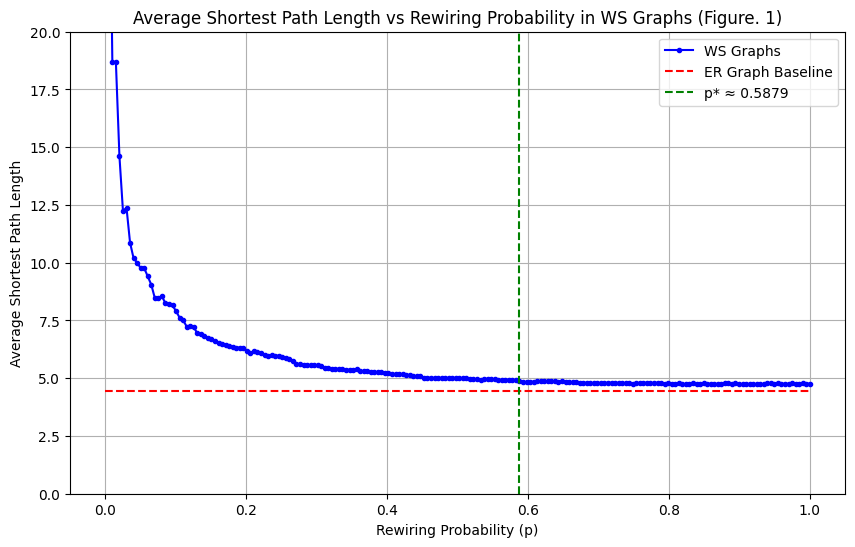

In [80]:
#Plot the results
delta = 0.1  # 10% tolerance; change as you like
L_ws = [list(d.values())[0] for d in avg_shortest_paths]

# 1) Find first p where WS is within (1+delta) of the baseline
target = (1 + delta) * L_er
idx = np.where(np.array(L_ws) <= target)[0]
p_star = p_values[idx[0]] if len(idx) else None

plt.figure(1, figsize=(10, 6))
plt.plot(p_values, L_ws, marker='o', markersize=3, color='blue', label='WS Graphs')
plt.hlines(L_er, color='red', xmin=0, xmax=max(p_values), linestyle='--', label='ER Graph Baseline')
plt.vlines(p_star, color='green', ymin=0, ymax=20, linestyle='--', label=f'p* ≈ {p_star:.4f}' if p_star else 'No p* found')
plt.ylim(0, 20)
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Graphs (Figure. 1)')
plt.grid(True)

plt.legend()
plt.show()

The value at which p is accepted has been chosen to be within 10% of the fully random networks average shortest path.

We have generated WS graphs for 200 different p values. As seen in figure 1, as p approaches 1 the corresponding average shortest path converges on the ER baseline. 

As mentioned accepted vakues has to be within 10% of the baseline, this happens when p reaches 0.5879 for this particular seed.